In [5]:
from overall_anotator import OverallAnotator
from data_structures import SentimentAnnotation, AspectAnnotation, AspectBasedResults
from transforms import transform_aspects

In [2]:
import pandas as pd
import numpy as np
laptops = pd.read_csv("../data/Laptop_Train_v2.csv").sort_values(by=['id'])
amazon = pd.read_csv("../data/amazon_electronics.csv")
to_annotate = list(laptops['Sentence'].unique()[1:10])


In [3]:
laptops_sentiment = transform_aspects(laptops, "id", "Sentence", "Aspect Term", "polarity")

In [4]:
flair_annotator = OverallAnotator(tool = "flair")
chat_annotator = OverallAnotator(tool = "chat_gpt", gpt_key="#Insert GPT key here")

In [5]:
flair_annotator.annotate(to_annotate)

[SentimentAnnotation(text='I bought a protector for my key pad and it works great :)', label='POSITIVE', score=0.9991540908813477),
 SentimentAnnotation(text="The mouse is a little bit different than what you're used to though- it has one big flat panel and one full bar (instead of two separate ones) to click with- but you get used to it quite quickly.", label='POSITIVE', score=0.9994210004806519),
 SentimentAnnotation(text='AND the best part is that it even comes with a free printer (when they have a certain promotion/offer going, of course)!', label='POSITIVE', score=0.9260948896408081),
 SentimentAnnotation(text='Overall, this laptop is definitely a keeper with its simple yet stylish design and its array of fantastic colors to choose from.', label='POSITIVE', score=0.9996365308761597),
 SentimentAnnotation(text='The Apple team also assists you very nicely when choosing which computer is right for you :)', label='POSITIVE', score=0.9991105198860168),
 SentimentAnnotation(text='For th

In [6]:
chat_annotator.annotate(to_annotate[1:3])

[SentimentAnnotation(text="The mouse is a little bit different than what you're used to though- it has one big flat panel and one full bar (instead of two separate ones) to click with- but you get used to it quite quickly.", label='Positive', score=0.8),
 SentimentAnnotation(text='AND the best part is that it even comes with a free printer (when they have a certain promotion/offer going, of course)!', label='Positive', score=0.8)]

In [11]:
from aspect_anotator import AspectAnotator

/bin/sh: line 1: nvidia-smi: command not found


No CUDA GPU found in your device
[2023-11-21 18:18:42] (2.3.4) PyABSA(2.3.4): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






/usr/lib/python3.11/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>


In [12]:
aspect_annotator = AspectAnotator(stage1_tool = "spacy", 
                                stage2_tool="sentistrength", 
                                ss_jar_path='/home/bartoszrozek/Downloads/pysenti/PySentiStrength-1.0.1/pysenti/original/SentiStrength.jar',
                                ss_lang_path='/home/bartoszrozek/Downloads/pysenti/PySentiStrength-1.0.1/pysenti/original/data')


In [13]:
aspect_annotator = AspectAnotator(full_tool="pyabsa")

[2023-11-21 18:18:54] (2.3.4) Please specify the task code, e.g. from pyabsa import TaskCodeOption
[2023-11-21 18:18:55] (2.3.4) Downloading checkpoint:multilingual 
[2023-11-21 18:18:55] (2.3.4) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets
[2023-11-21 18:18:55] (2.3.4) Checkpoint already downloaded, skip
[2023-11-21 18:18:55] (2.3.4) Load aspect extractor from checkpoints/ATEPC_MULTILINGUAL_CHECKPOINT
[2023-11-21 18:18:55] (2.3.4) config: checkpoints/ATEPC_MULTILINGUAL_CHECKPOINT/fast_lcf_atepc.config
[2023-11-21 18:18:55] (2.3.4) state_dict: checkpoints/ATEPC_MULTILINGUAL_CHECKPOINT/fast_lcf_atepc.state_dict
[2023-11-21 18:18:55] (2.3.4) model: None
[2023-11-21 18:18:55] (2.3.4) tokenizer: checkpoints/ATEPC_MULTILINGUAL_CHECKPOINT/fast_lcf_atepc.tokenizer
[2023-11-21 18:18:56] (2.3.4) Set Model Device: cpu
[2023-11-21 18:18:56] (2.3.4) Device Name: Unknown


/home/bartoszrozek/Documents/Studies/s02/NLP/Project 1/NLP-BAMK-project/.venv/lib/python3.11/site-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.


In [14]:
ind = list(np.random.randint(1,len(laptops_sentiment), 200))
true_annots = [laptops_sentiment[i] for i in ind]
texts = [x.text for x in true_annots]

In [15]:
res = aspect_annotator.test_annotator(true_annotations=true_annots)

preparing apc inference dataloader: 100%|██████████| 310/310 [00:00<00:00, 328.34it/s]
/home/bartoszrozek/Documents/Studies/s02/NLP/Project 1/NLP-BAMK-project/.venv/lib/python3.11/site-packages/pyabsa/tasks/AspectTermExtraction/prediction/aspect_extractor.py:566: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
classifying aspect sentiments: 100%|██████████| 10/10 [02:11<00:00, 13.20s/it]


In [18]:
res

AspectBasedResults(correct=249, incorrect=8, partial=24, missing=25, spurious=29, possible=306, actual=310, precision=0.8032258064516129, recall=0.8137254901960784, f1=0.8084415584415584)

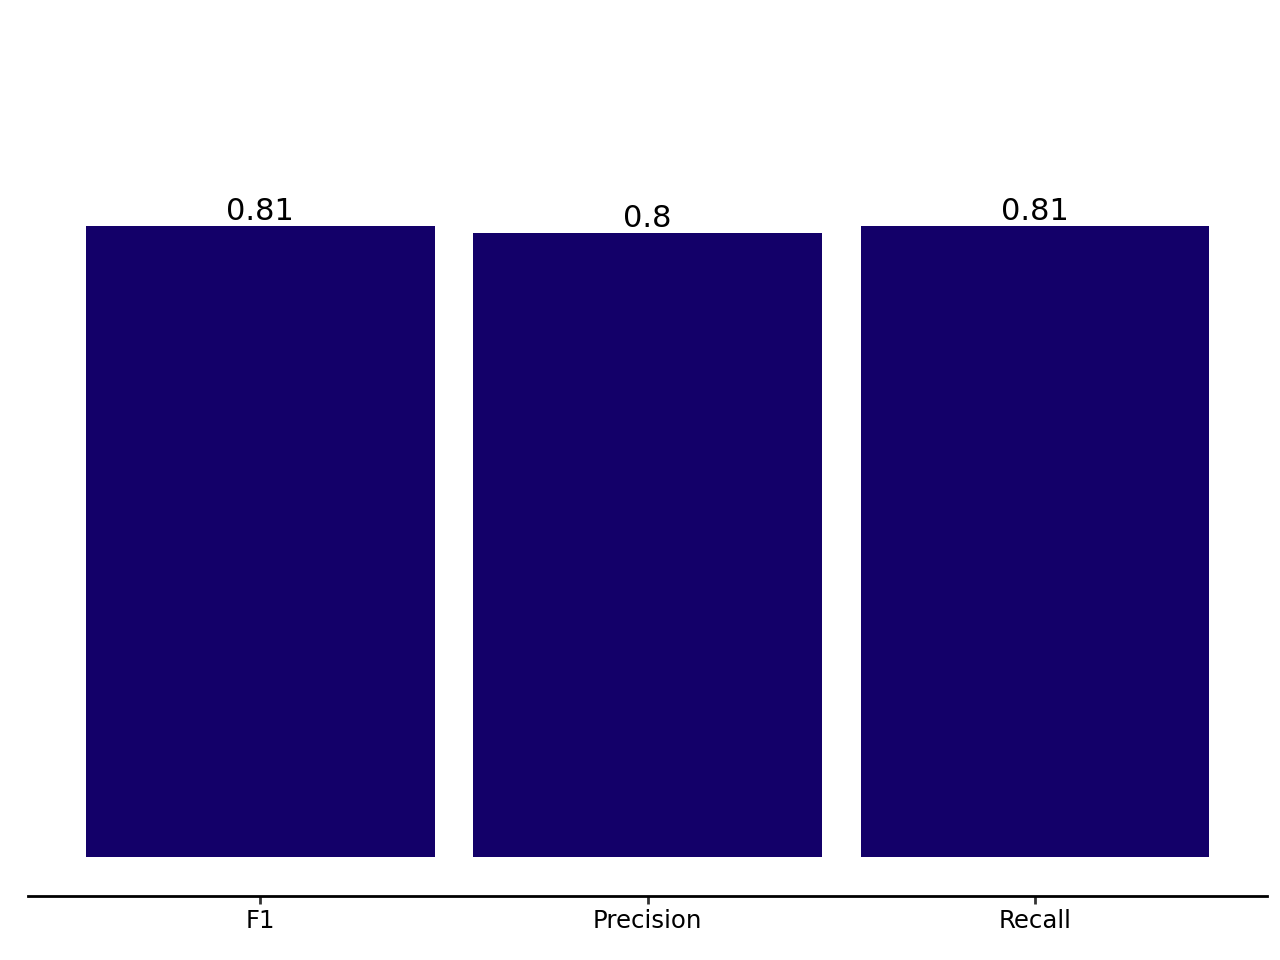

<Figure Size: (640 x 480)>

In [19]:
res.plot()

In [14]:
aspect_annotator.annotate(texts)

[AspectAnnotation(text='Another thing is that after only a month the left mouse key broke and it costed $ 175 to send it in to fix it .', aspects=[SentimentAnnotation(text='left mouse key', label='Negative', score=0.9424)]),
 AspectAnnotation(text='I had in the past a Dell laptop and they sent me the items it needed or they sent a repair technician to my house to fix it .', aspects=[SentimentAnnotation(text='items', label='Positive', score=0.8516), SentimentAnnotation(text='repair technician', label='Positive', score=0.7057)])]

In [6]:
results = amazon['overall'].copy().astype(str)

In [7]:
results[amazon['overall']>3] = "positive"
results[amazon['overall']==3] = "neutral"
results[amazon['overall']<3] = "negative"

In [8]:
annotator = OverallAnotator(tool = "sentistrength", 
                            ss_jar_path='/home/bartoszrozek/Downloads/pysenti/PySentiStrength-1.0.1/pysenti/original/SentiStrength.jar',
                            ss_lang_path='/home/bartoszrozek/Downloads/pysenti/PySentiStrength-1.0.1/pysenti/original/data')

In [9]:
ind = list(np.random.randint(1,len(results), 100))
res = annotator.test_annotator(amazon['reviewText'][ind], results[ind])

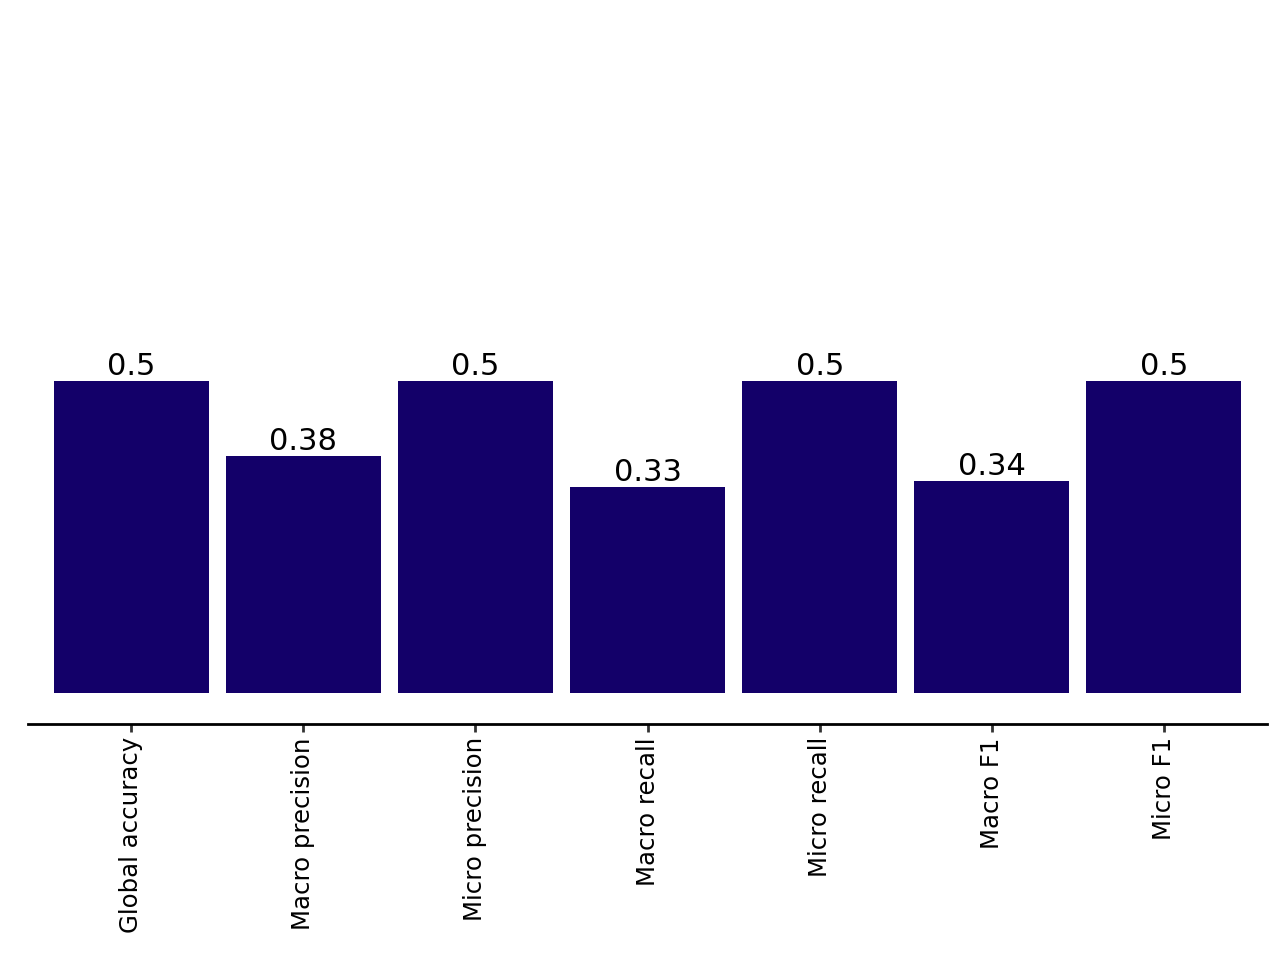

<Figure Size: (640 x 480)>

In [10]:
res.plot()